# Naive Bayes

## Import thư viện

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import bộ dữ liệu

In [18]:
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Chia bộ dữ liệu thành tập train và tập test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [20]:
print(X_train)

[[58.  1.  2. ...  2.  2.  3.]
 [52.  1.  0. ...  2.  1.  2.]
 [54.  1.  2. ...  2.  0.  3.]
 ...
 [56.  1.  3. ...  1.  0.  3.]
 [47.  1.  2. ...  2.  0.  2.]
 [58.  1.  1. ...  1.  0.  2.]]


In [21]:
print(y_train)

[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1
 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0]


In [22]:
print(X_test)

[[7.00e+01 1.00e+00 0.00e+00 1.45e+02 1.74e+02 0.00e+00 1.00e+00 1.25e+02
  1.00e+00 2.60e+00 0.00e+00 0.00e+00 3.00e+00]
 [6.40e+01 1.00e+00 3.00e+00 1.70e+02 2.27e+02 0.00e+00 0.00e+00 1.55e+02
  0.00e+00 6.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [5.90e+01 1.00e+00 3.00e+00 1.70e+02 2.88e+02 0.00e+00 0.00e+00 1.59e+02
  0.00e+00 2.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [6.00e+01 1.00e+00 0.00e+00 1.25e+02 2.58e+02 0.00e+00 0.00e+00 1.41e+02
  1.00e+00 2.80e+00 1.00e+00 1.00e+00 3.00e+00]
 [6.20e+01 1.00e+00 2.00e+00 1.30e+02 2.31e+02 0.00e+00 1.00e+00 1.46e+02
  0.00e+00 1.80e+00 1.00e+00 3.00e+00 3.00e+00]
 [4.80e+01 1.00e+00 0.00e+00 1.24e+02 2.74e+02 0.00e+00 0.00e+00 1.66e+02
  0.00e+00 5.00e-01 1.00e+00 0.00e+00 3.00e+00]
 [4.00e+01 1.00e+00 0.00e+00 1.10e+02 1.67e+02 0.00e+00 0.00e+00 1.14e+02
  1.00e+00 2.00e+00 1.00e+00 0.00e+00 3.00e+00]
 [6.30e+01 1.00e+00 0.00e+00 1.30e+02 2.54e+02 0.00e+00 0.00e+00 1.47e+02
  0.00e+00 1.40e+00 1.00e+00 1.00e+00 3.00e+00]
 [5.60e+01 0.00e+00 0.00

In [23]:
print(y_test)

[0 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0
 0 1]


## Scale dữ liệu

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
print(X_train)

[[ 0.35256528  0.70243936  0.9870291  ...  0.96222601  1.22723311
   1.12135917]
 [-0.31068598  0.70243936 -0.91982712 ...  0.96222601  0.25993479
  -0.45968761]
 [-0.08960223  0.70243936  0.9870291  ...  0.96222601 -0.70736353
   1.12135917]
 ...
 [ 0.13148153  0.70243936  1.94045721 ... -0.6557392  -0.70736353
   1.12135917]
 [-0.86339537  0.70243936  0.9870291  ...  0.96222601 -0.70736353
  -0.45968761]
 [ 0.35256528  0.70243936  0.03360099 ... -0.6557392  -0.70736353
  -0.45968761]]


In [26]:
print(X_test)

[[ 1.67906782  0.70243936 -0.91982712  0.77497606 -1.35743293 -0.42695628
   0.89174012 -1.04934923  1.38212026  1.22827842 -2.27370441 -0.70736353
   1.12135917]
 [ 1.01581655  0.70243936  1.94045721  2.22645762 -0.380682   -0.42695628
  -0.9825655   0.238927   -0.72352604 -0.4269261  -0.6557392  -0.70736353
   1.12135917]
 [ 0.46310716  0.70243936  1.94045721  2.22645762  0.74350304 -0.42695628
  -0.9825655   0.41069717 -0.72352604 -0.757967   -0.6557392  -0.70736353
   1.12135917]
 [ 0.57364904  0.70243936 -0.91982712 -0.38620919  0.19062515 -0.42695628
  -0.9825655  -0.36226857  1.38212026  1.39379887 -0.6557392   0.25993479
   1.12135917]
 [ 0.79473279  0.70243936  0.9870291  -0.09591288 -0.30696495 -0.42695628
   0.89174012 -0.14755587 -0.72352604  0.56619661 -0.6557392   2.19453143
   1.12135917]
 [-0.75285349  0.70243936 -0.91982712 -0.44426845  0.48549336 -0.42695628
  -0.9825655   0.71129496 -0.72352604 -0.50968632 -0.6557392  -0.70736353
   1.12135917]
 [-1.63718851  0.70243

## Sử dụng PCA để giảm chiều dữ liệu

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

## Train model Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Dự đoán kết quả với input bất kì

In [35]:
print(classifier.predict(pca.transform([[19,1]])))

[0]


## Dự đoán kết quả trên tập test

In [36]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


## Tạo confusion matrix và print accuracy, precison, recall và f1 của model

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("true negative: ", tn)
print("\nfalse positive: ", fp)
print("\nfalse negative: ", fn)
print("\ntrue positive: ", tp)
print('\nconfusion matrix: \n', cm)
print('\naccuracy: ', accuracy_score(y_test, y_pred))
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))

true negative:  23

false positive:  10

false negative:  2

true positive:  41

confusion matrix: 
 [[23 10]
 [ 2 41]]

accuracy:  0.8421052631578947
precision:  0.803921568627451
recall:  0.9534883720930233
f1_score:  0.8723404255319148


## Trực quan hóa kết quả tập train

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


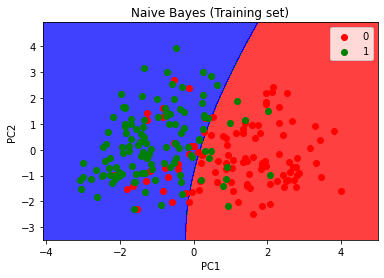

In [38]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Trực quan hóa kết quả tập test

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


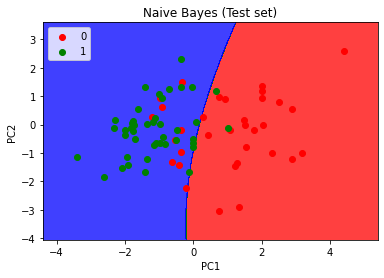

In [39]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()